In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [67]:
df = pd.read_csv('horoscope_saved.csv')
#df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,sign,category,date,horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'l..."
1,aries,general,20200618,People will understand and appreciate your des...
2,aries,general,20200619,You are very interested in technological break...
3,aries,general,20200620,Stress from overwork could have you feeling we...
4,aries,general,20200621,This is a good day to stand up for yourself an...
...,...,...,...,...
21954,pisces,birthday,20210612,Celebrate in style on your birthday in prepara...
21955,pisces,birthday,20210613,Imagine your life as if it was exactly the way...
21956,pisces,birthday,20210614,"Fun, playfulness, and humor are easy to manife..."
21957,pisces,birthday,20210615,"Your birthday brings you a fresh start, as you..."


In [ ]:
#df['date'] = df['date'].dt.date
#df

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21959 entries, 0 to 21958
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sign       21959 non-null  object
 1   category   21959 non-null  object
 2   date       21959 non-null  int64 
 3   horoscope  21959 non-null  object
dtypes: int64(1), object(3)
memory usage: 686.3+ KB


In [47]:
df.describe(include = 'all')

,sign,category,date,horoscope
count,21959,21959,2.195900e+04,21959
unique,12,5,NaN,12050
top,leo,wellness,NaN,"It's a generous, joy-filled year when the good..."
freq,1830,4392,NaN,12
mean,NaN,NaN,2.020523e+07,NaN
std,NaN,NaN,4.688102e+03,NaN
min,NaN,NaN,2.020062e+07,NaN
25%,NaN,NaN,2.020092e+07,NaN
50%,NaN,NaN,2.020122e+07,NaN
75%,NaN,NaN,2.021032e+07,NaN


In [48]:
df.isnull().sum()

sign         0
category     0
date         0
horoscope    0
dtype: int64

In [49]:
df.shape

(21959, 4)

**Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


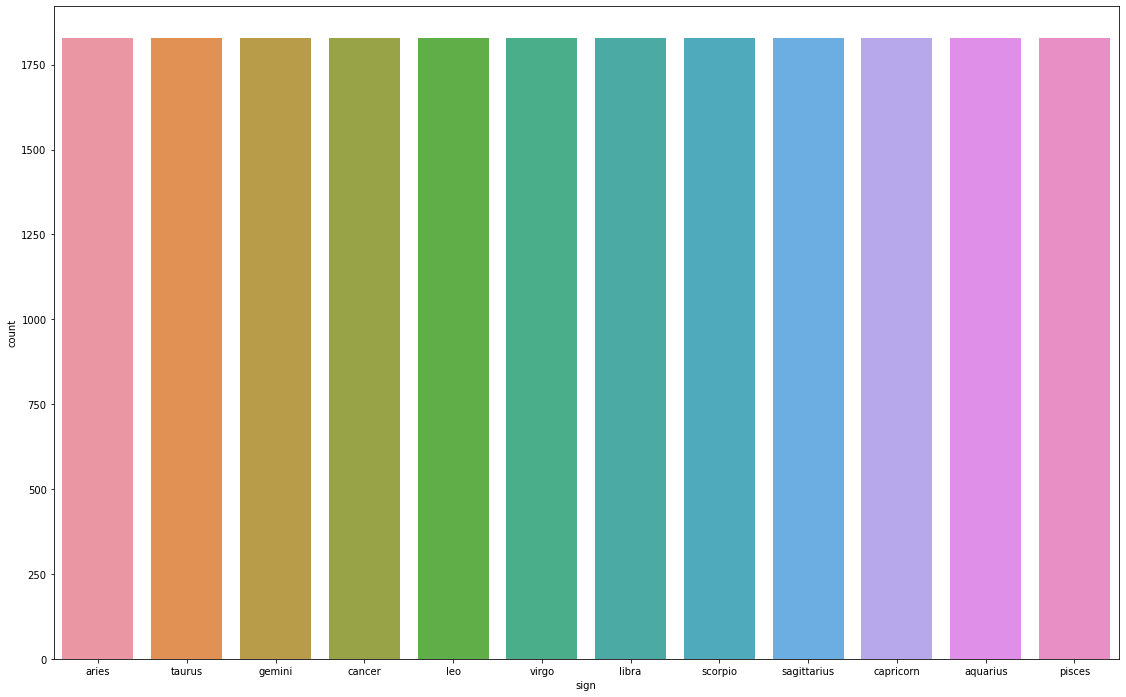

In [50]:
#Univariated analysis sign

f = plt.figure(figsize=(42,12))
f.add_subplot(1,2,1)
sns.countplot(df['sign'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


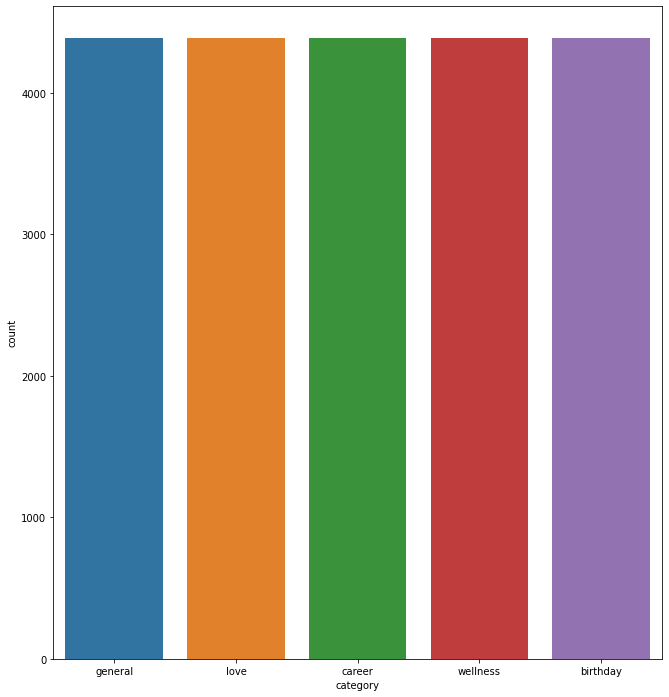

In [51]:
#Univariated analysis category

f = plt.figure(figsize=(24,12))
f.add_subplot(1,2,1)
sns.countplot(df['category'])
plt.show()

**Data Preperation**

In [52]:
#from nltk.corpus import stopwords #comment jika Error dan gunakan 2 sintaks dibawah
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
df['horoscope_stopword'] = df['horoscope'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.head()

,sign,category,date,horoscope,horoscope_stopword
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'l...","There's great day ahead you, Aries. You'll ble..."
1,aries,general,20200618,People will understand and appreciate your des...,People understand appreciate desire stand crow...
2,aries,general,20200619,You are very interested in technological break...,You interested technological breakthroughs inn...
3,aries,general,20200620,Stress from overwork could have you feeling we...,Stress overwork could feeling weaker usual. Yo...
4,aries,general,20200621,This is a good day to stand up for yourself an...,"This good day stand make known pushover, Aries..."


In [54]:
#label encoding

# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['sign']= label_encoder.fit_transform(df['sign']) 
df['category']= label_encoder.fit_transform(df['category'])

df

,sign,category,date,horoscope,horoscope_stopword
0,1,2,20200617,"There's a great day ahead of you, Aries. You'l...","There's great day ahead you, Aries. You'll ble..."
1,1,2,20200618,People will understand and appreciate your des...,People understand appreciate desire stand crow...
2,1,2,20200619,You are very interested in technological break...,You interested technological breakthroughs inn...
3,1,2,20200620,Stress from overwork could have you feeling we...,Stress overwork could feeling weaker usual. Yo...
4,1,2,20200621,This is a good day to stand up for yourself an...,"This good day stand make known pushover, Aries..."
...,...,...,...,...,...
21954,7,0,20210612,Celebrate in style on your birthday in prepara...,Celebrate style birthday preparation great thi...
21955,7,0,20210613,Imagine your life as if it was exactly the way...,Imagine life exactly way wanted it. This birth...
21956,7,0,20210614,"Fun, playfulness, and humor are easy to manife...","Fun, playfulness, humor easy manifest year bir..."
21957,7,0,20210615,"Your birthday brings you a fresh start, as you...","Your birthday brings fresh start, clear away c..."


In [55]:
#one-hot-encoding

#sign = pd.get_dummies(df.sign)
#category = pd.get_dummies(df.category)
#new_df = pd.concat([df, sign, category], axis=1) #, category
#new_df = new_df.drop(columns='sign')
#new_df = new_df.drop(columns='category')
#new_df

In [56]:
horo = new_df['horoscope_stopword'].values
#labels = new_df[['date', 'aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo', 'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo', 'birthday', 'career', 'general', 'love', 'wellness']].values #, 'birthday', 'career', 'general', 'love', 'wellness'
labels = df[['sign', 'category']]

In [57]:
#memisahkan data training dan validasi (data validasi hanya terdiri 20% dari total dataset)
horo_latih, horo_test, labels_latih, labels_test = train_test_split(horo, labels, test_size=0.2)

In [58]:
#fungsi tokenizer
filt = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>', filters = filt)
tokenizer.fit_on_texts(horo_latih)
tokenizer.fit_on_texts(horo_test)
 
sekuens_latih = tokenizer.texts_to_sequences(horo_latih)
sekuens_test = tokenizer.texts_to_sequences(horo_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

**Modeling**

In [59]:
#implementasi callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and 
       logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [63]:
#Arsitektur model machine learning dengan menggunakan embedding dan LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=32),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          480000    
                                                                 
 lstm_5 (LSTM)               (None, 128)               82432     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 2)                 130       
                                                                 
Total params: 587,330
Trainable params: 587,330
Non-trainable params: 0
_________________________________________________________________


In [64]:
#compiler
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
num_epochs = 20
history = model.fit(padded_latih, labels_latih, epochs=num_epochs, 
                    validation_data=(padded_test, labels_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
549/549 - 113s - loss: 17411.1973 - accuracy: 0.8314 - val_loss: 54435.5469 - val_accuracy: 0.8402 - 113s/epoch - 207ms/step
Epoch 2/20
549/549 - 58s - loss: 130502.5703 - accuracy: 0.8317 - val_loss: 225521.0625 - val_accuracy: 0.8402 - 58s/epoch - 107ms/step
Epoch 3/20
549/549 - 56s - loss: 339348.2500 - accuracy: 0.8317 - val_loss: 475443.2188 - val_accuracy: 0.8402 - 56s/epoch - 102ms/step
Epoch 4/20
549/549 - 57s - loss: 633219.2500 - accuracy: 0.8317 - val_loss: 770242.3125 - val_accuracy: 0.8402 - 57s/epoch - 103ms/step
Epoch 5/20
549/549 - 57s - loss: 969664.2500 - accuracy: 0.8317 - val_loss: 1114884.3750 - val_accuracy: 0.8402 - 57s/epoch - 104ms/step
Epoch 6/20
549/549 - 59s - loss: 1336125.0000 - accuracy: 0.8317 - val_loss: 1522713.0000 - val_accuracy: 0.8402 - 59s/epoch - 107ms/step
Epoch 7/20
549/549 - 59s - loss: 1795718.5000 - accuracy: 0.8317 - val_loss: 1940449.8750 - val_accuracy: 0.8402 - 59s/epoch - 107ms/step
Epoch 8/20
549/549 - 57s - loss: 2209408.50